# Lab 7 Submission

## A1: Calculate Entropy and Information Gain

In [1]:
import pandas as pd
import numpy as np

# Define the dataset
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(labels):
    classes, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy_value = -sum(probabilities * np.log2(probabilities))
    return entropy_value

# Function to calculate information gain
def info_gain(df, split_attribute_name, target_attribute_name="buys_computer"):
    total_entropy = entropy(df[target_attribute_name])
    vals, counts = np.unique(df[split_attribute_name], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(df[df[split_attribute_name] == vals[i]][target_attribute_name]) for i in range(len(vals)))
    return total_entropy - weighted_entropy

# Calculate information gain for each attribute
attributes = ['age', 'income', 'student', 'credit_rating']
gains = {attr: info_gain(df, attr) for attr in attributes}

# Output the information gain for each attribute
print("Information Gains:", gains)


Information Gains: {'age': 0.24674981977443933, 'income': 0.014956069928972804, 'student': 0.15183550136234159, 'credit_rating': 0.04812703040826949}


## A2: Construct a Decision Tree

In [2]:
from sklearn.tree import DecisionTreeClassifier

# Preprocess the dataset for Decision Tree (Label Encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

# Build the decision tree
model = DecisionTreeClassifier()
model.fit(X, y)
model.score(X,y)

# Print the depth of the tree
print("Depth of the Decision Tree:", model.get_depth())


Depth of the Decision Tree: 4


## A3: Visualize the Decision Tree

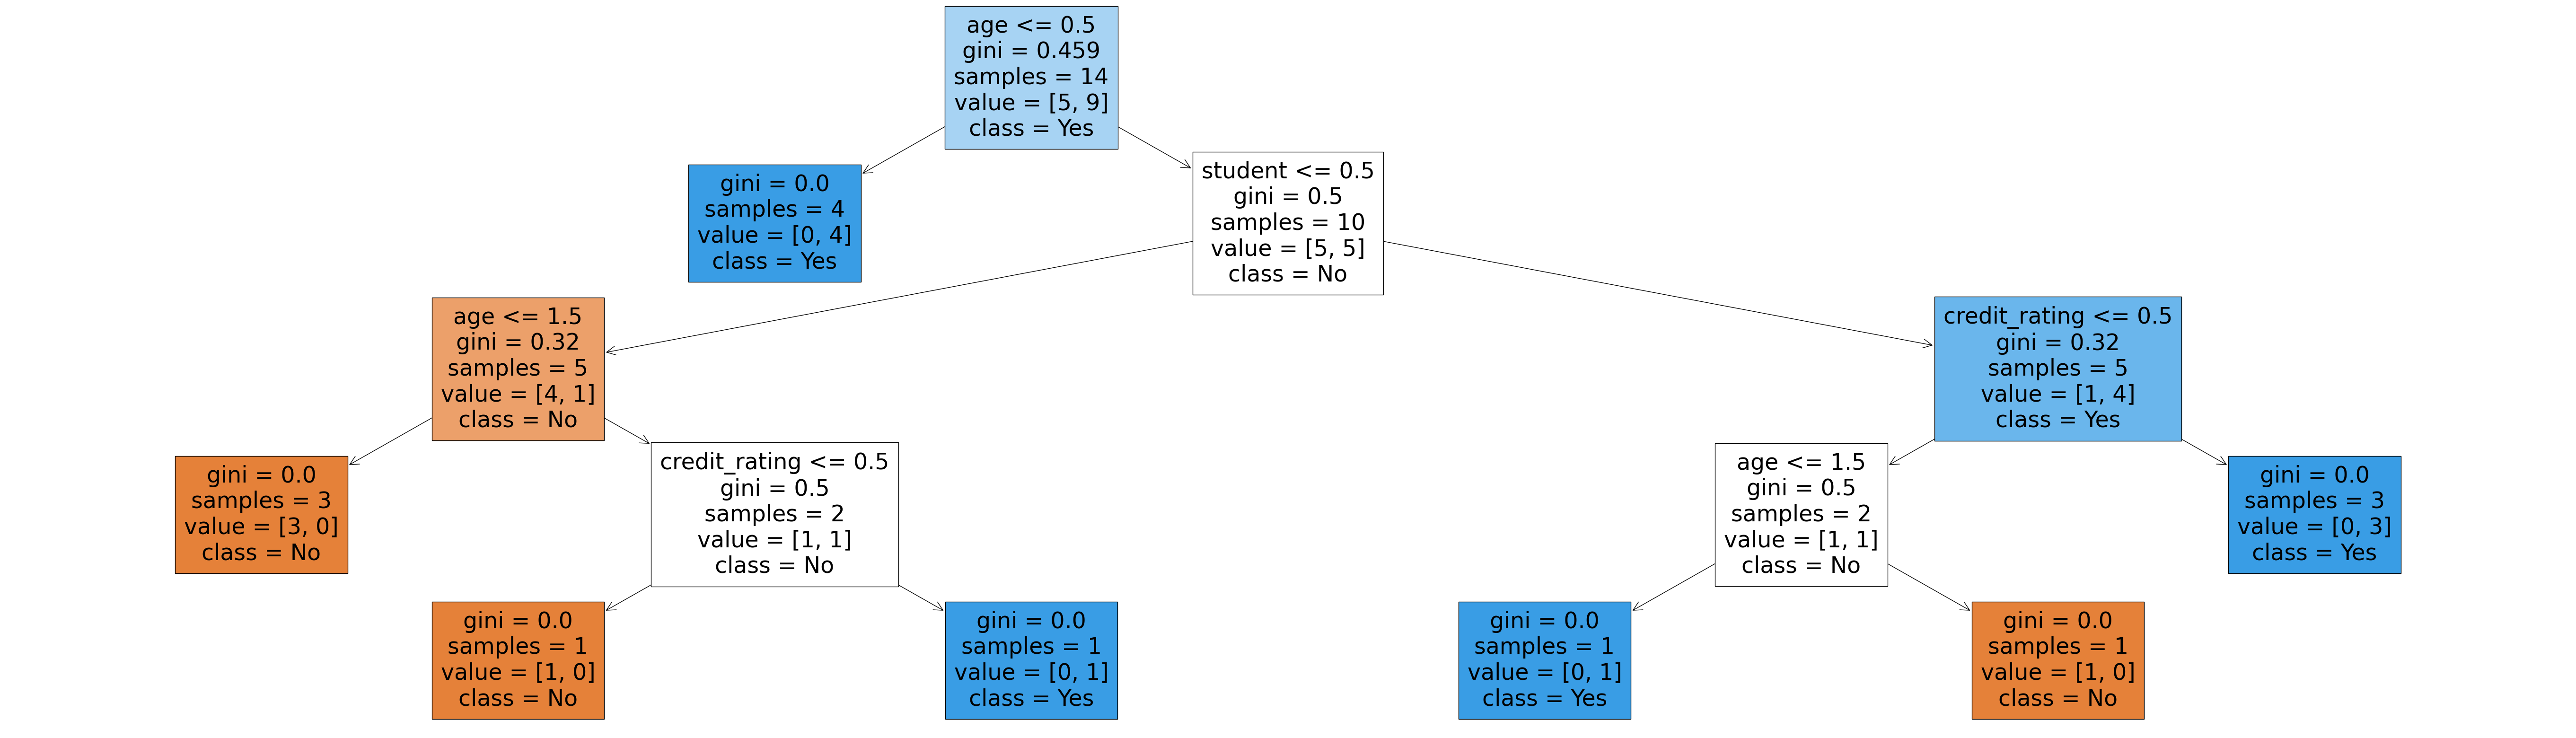

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert X.columns to a list
feature_names = list(X.columns)

plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=feature_names, class_names=['No', 'Yes'])
plt.show()

## A4: Decision Tree Classifier on Project Data

Training Accuracy: 1.0
Test Accuracy: 0.9132492113564669


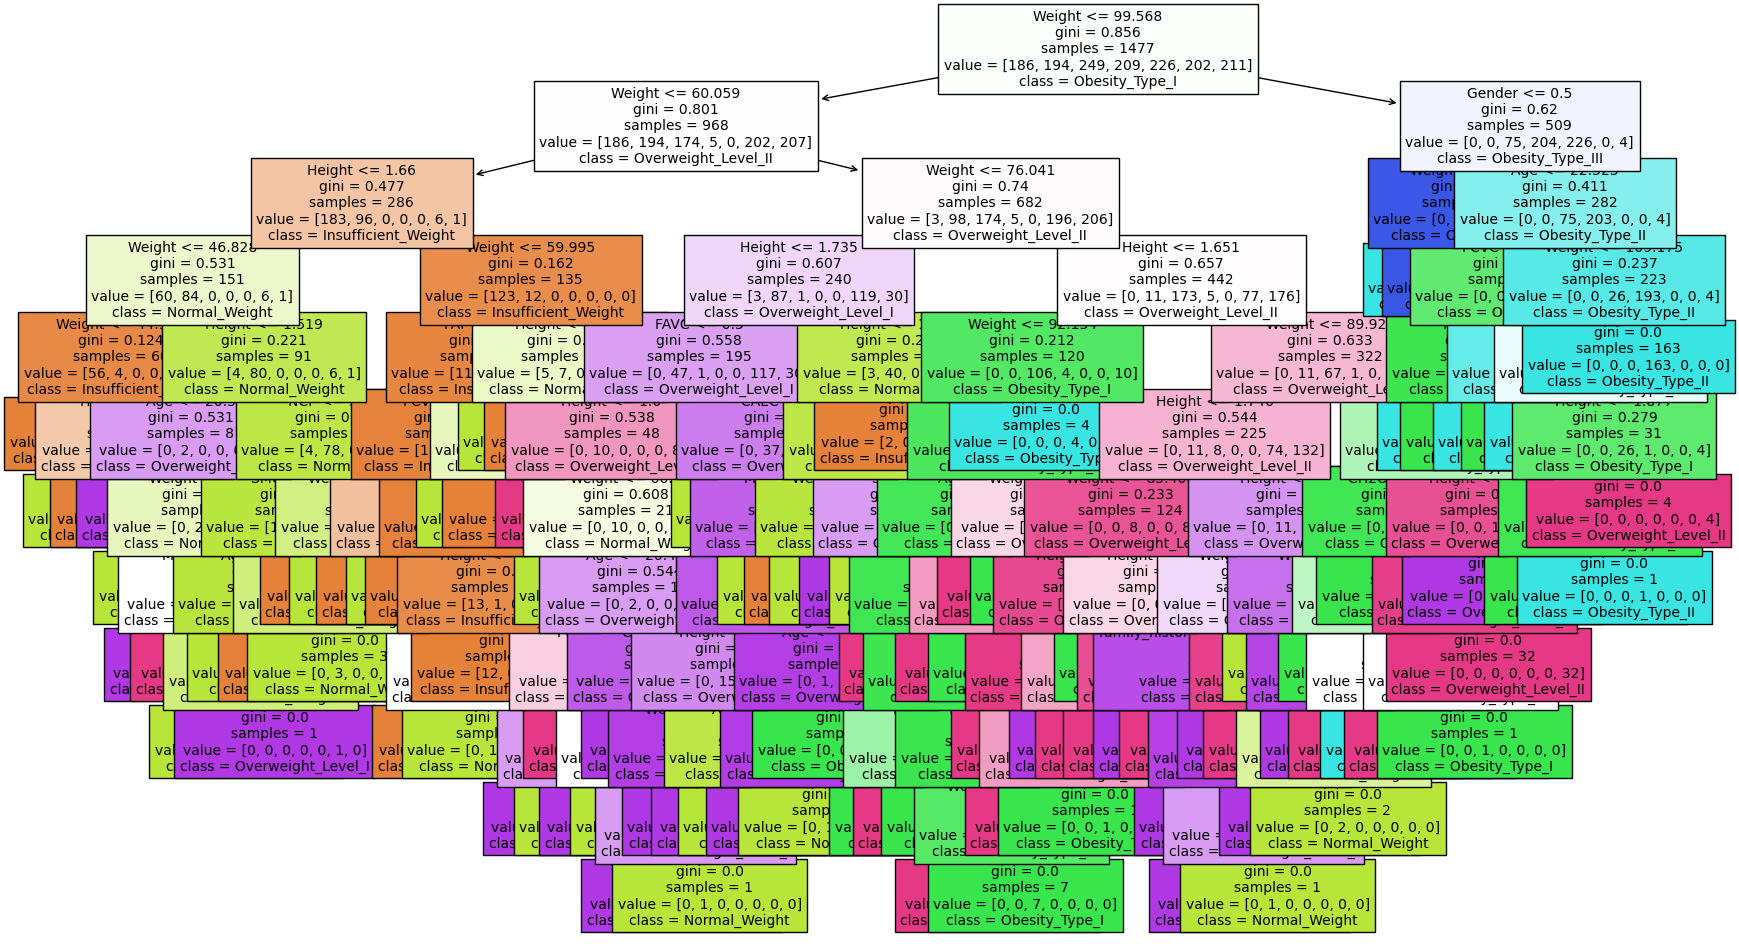

In [13]:
# Load your dataset (adjust the file path as needed)
obesity_data = pd.read_csv('Obesity.csv')

# Assuming obesity_data is loaded (replace with your actual project data)
X_project = obesity_data.drop('NObeyesdad', axis=1)
y_project = obesity_data['NObeyesdad']

# Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in X_project.select_dtypes(include=['object']).columns:
    X_project[col] = le.fit_transform(X_project[col])

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_project, y_project, test_size=0.3, random_state=42)

# Train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_project = DecisionTreeClassifier()
model_project.fit(X_train, y_train)

# Check accuracy
train_accuracy = model_project.score(X_train, y_train)
test_accuracy = model_project.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Convert class names and feature names to lists
class_names = list(model_project.classes_)
feature_names = list(X_train.columns)

# Plot the decision tree with larger font size and figure size
plt.figure(figsize=(20, 12))  # Adjust figure size
plot_tree(model_project, 
          filled=True, 
          feature_names=feature_names,  # Convert column names to list
          class_names=class_names,  # Convert class names to list
          fontsize=10)  # Increase font size for better visibility
plt.show()

## A5: Max Depth Constraint

Training Accuracy (Max Depth=5): 0.8503723764387271
Test Accuracy (Max Depth=5): 0.8233438485804416


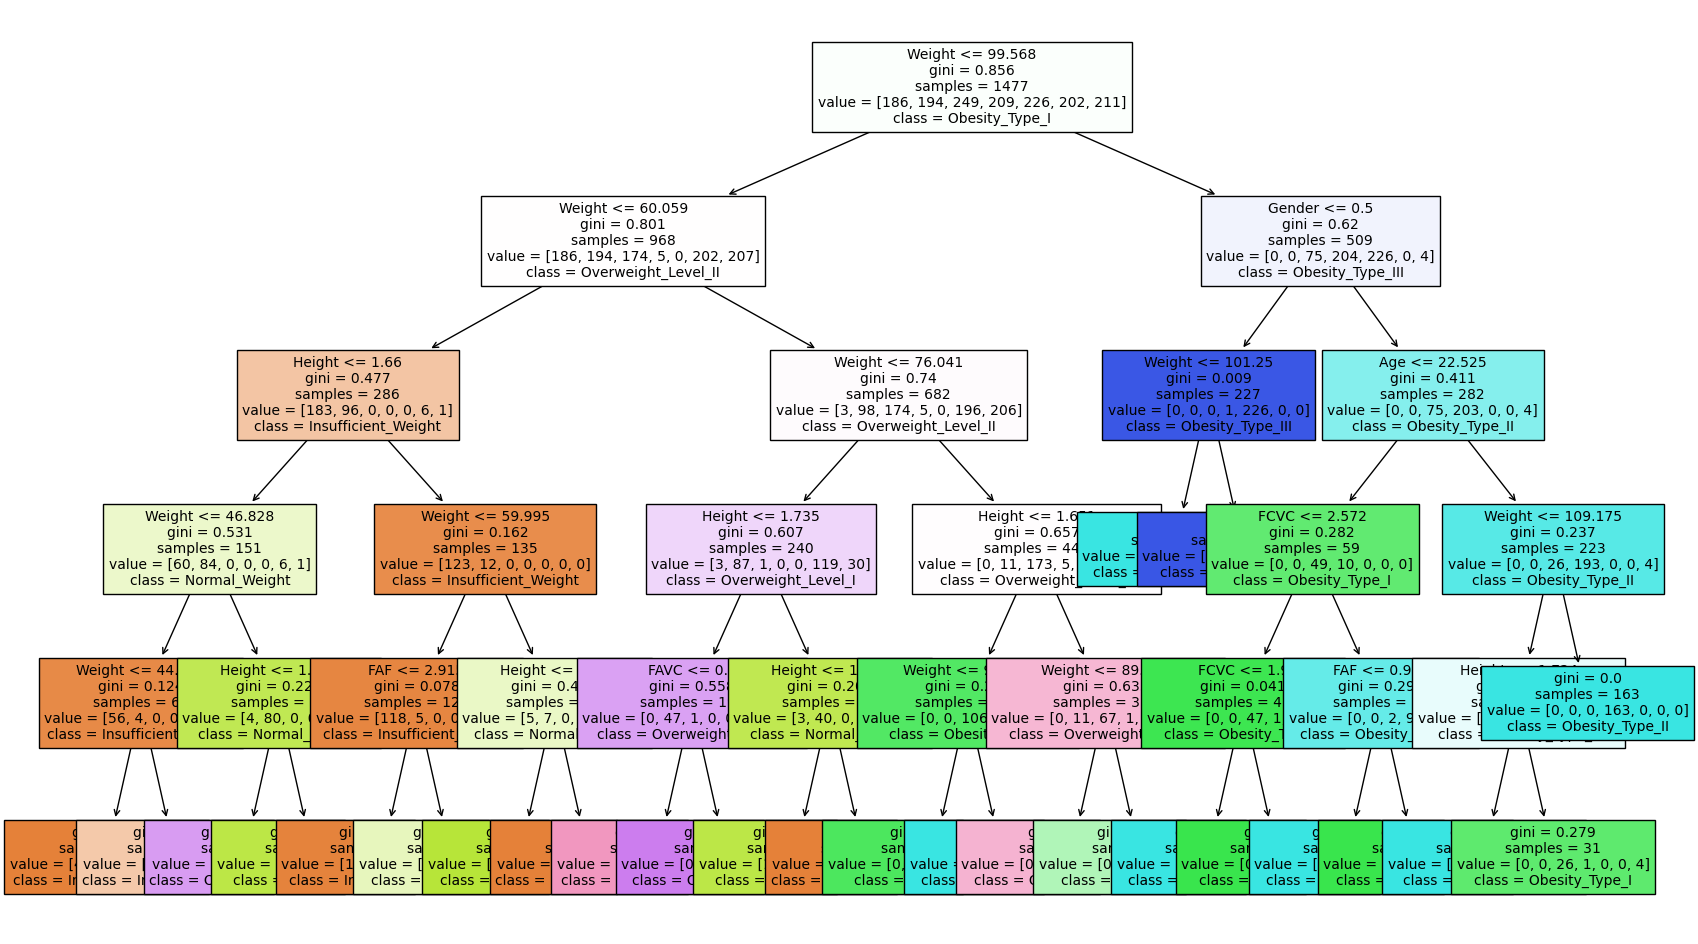

In [15]:
# Build a decision tree with max depth constraint
model_constrained = DecisionTreeClassifier(max_depth=5)
model_constrained.fit(X_train, y_train)

# Check accuracies
train_accuracy_constrained = model_constrained.score(X_train, y_train)
test_accuracy_constrained = model_constrained.score(X_test, y_test)

print(f"Training Accuracy (Max Depth=5): {train_accuracy_constrained}")
print(f"Test Accuracy (Max Depth=5): {test_accuracy_constrained}")

# Convert class names and feature names to lists
class_names = list(model_constrained.classes_)
feature_names = list(X_train.columns)

# Plot the constrained decision tree with larger font and figure size
plt.figure(figsize=(20, 12))  # Adjust figure size
plot_tree(model_constrained, 
          filled=True, 
          feature_names=feature_names,  # Convert column names to list
          class_names=class_names,  # Convert class names to list
          fontsize=10)  # Increase font size for better visibility
plt.show()

## A6: Change Criterion to 'Entropy'

Training Accuracy (Entropy): 0.8442789438050101
Test Accuracy (Entropy): 0.8107255520504731


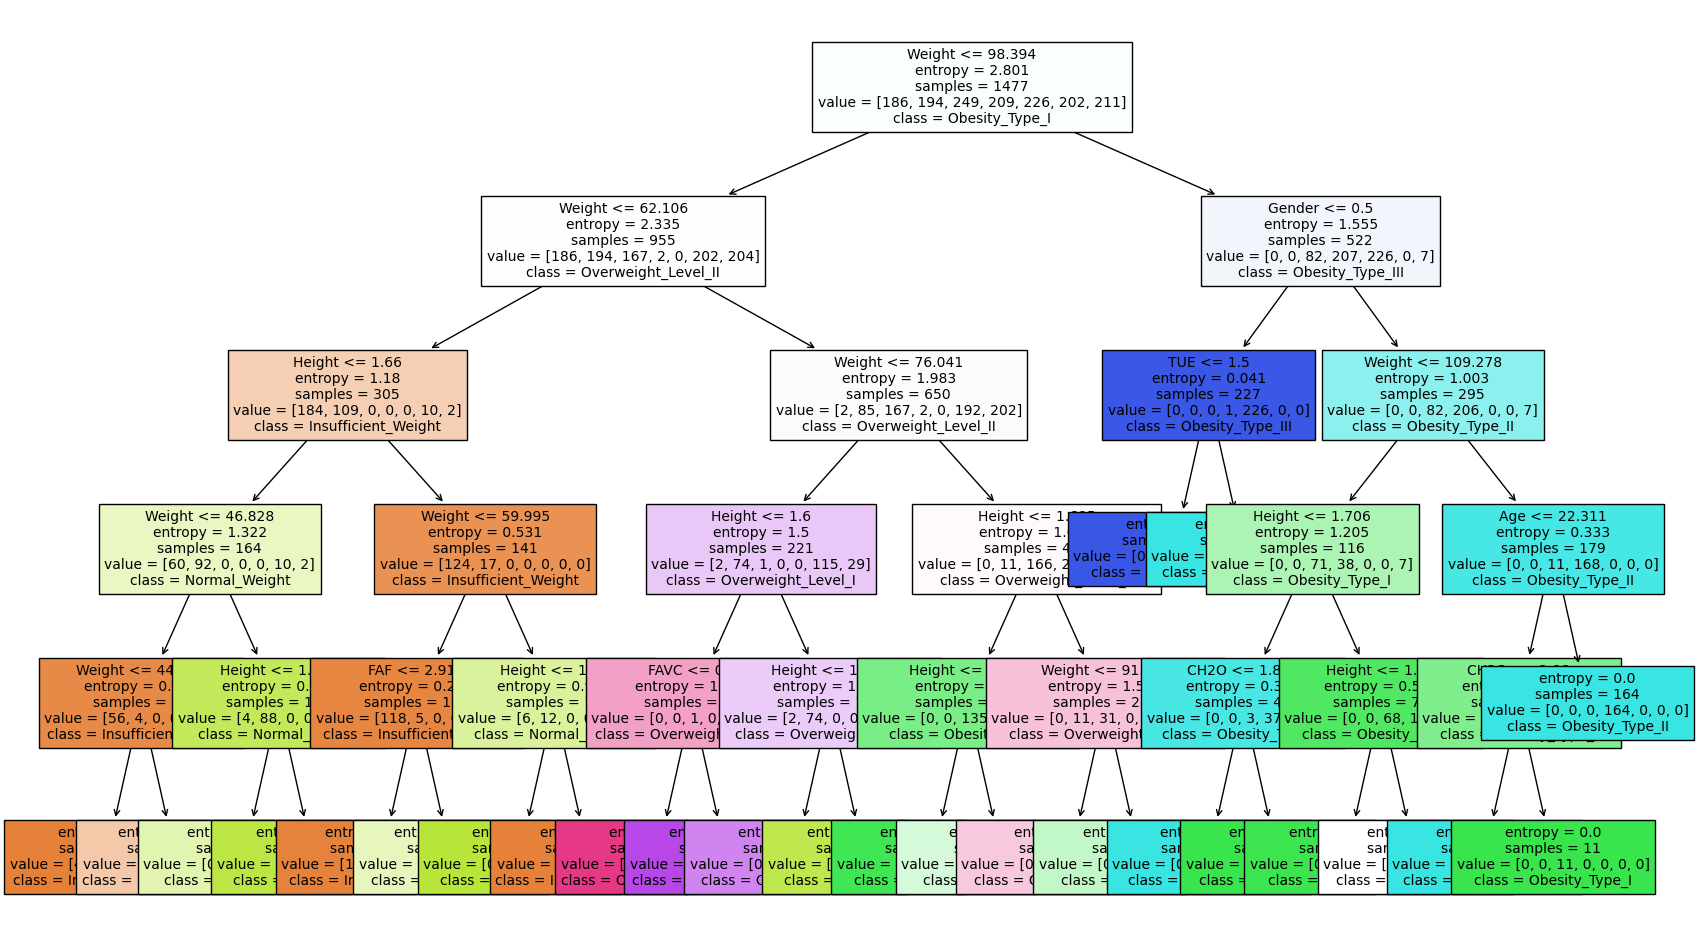

In [16]:
# Change criterion to 'entropy'
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model_entropy.fit(X_train, y_train)

# Check accuracies
train_accuracy_entropy = model_entropy.score(X_train, y_train)
test_accuracy_entropy = model_entropy.score(X_test, y_test)

print(f"Training Accuracy (Entropy): {train_accuracy_entropy}")
print(f"Test Accuracy (Entropy): {test_accuracy_entropy}")

# Convert class names and feature names to lists
class_names = list(model_entropy.classes_)
feature_names = list(X_train.columns)

# Plot the decision tree with entropy criterion
plt.figure(figsize=(20, 12))  # Adjust figure size
plot_tree(model_entropy, 
          filled=True, 
          feature_names=feature_names,  # Convert column names to list
          class_names=class_names,  # Convert class names to list
          fontsize=10)  # Increase font size for better visibility
plt.show()